In [ ]:
# IMPORTANTDO AS FUNÇÕES NECESSÁRIAS - USO DO KERAS E TENSORFLOW
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping

from keras import regularizers
from keras.models import Model

import matplotlib.pyplot as plt
import matplotlib.style as sty

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

import os
import random as rn
import seaborn as sns

import tensorflow as tf



In [ ]:
# Configurações relacionados ao problema e ao treinamento
batch_size = 64  # Quantridade de amostras em cada lote de treinamento
epochs = 50 # Número máximo de épocas de treinamernto
num_classes = 10  # Número de classes do problema


#Cada imagem do MNIST tem o tamanho de 28 por 28 pixels
img_rows, img_cols = 28, 28

11490434/11490434 [==============================] - 0s 0us/step


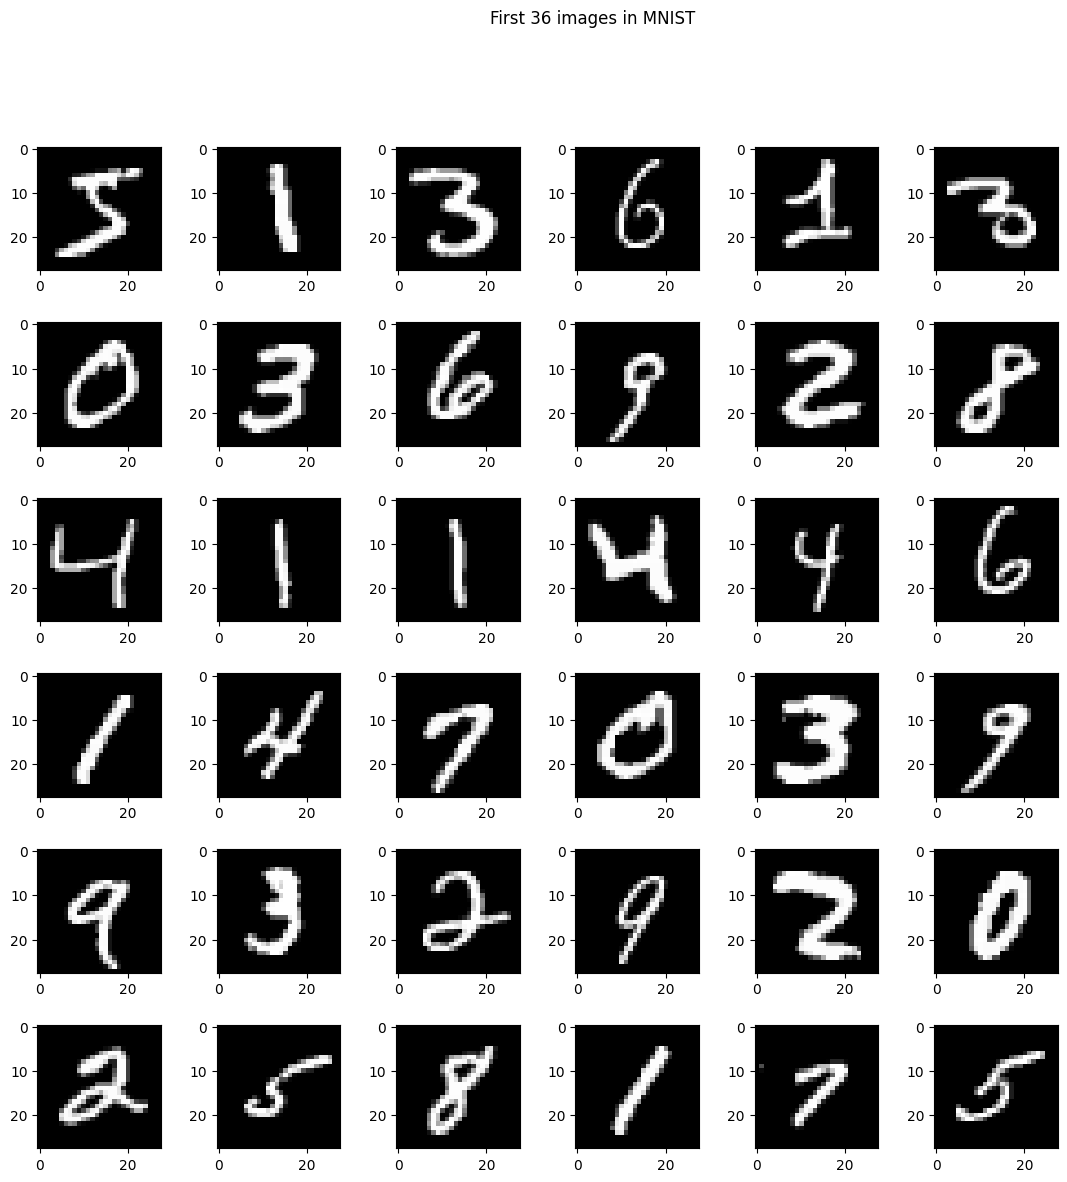

In [ ]:
#Carregando imagens e plotando alguns exemplos

from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255.0
x_test /= 255.0

# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
#    ax[x, y].set_title(y_train[x + y * 6])


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Definindo a CNN
model=Sequential()

# Primeiro Bloco
model.add(Conv2D(32, (3,3), padding='same',  activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

# Segundo Bloco
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

# Terceiro Bloco
model.add(Conv2D(128, (3,3),  padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

# Parte totalmente conectada (densa)
model.add(Flatten())  # Aqui podemos utilizar como alternativa ao Flatten() -> GlobalAvgPooling/GlobalMaxPooling
model.add(Dense(512, activation='relu'))  # camada densa
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))



In [ ]:
# Compilar a CNN
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


In [ ]:
# Imprimir a architetura
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [ ]:
# Treinar a CNN
# Monitoramento do treinamento considerando acurácia na base de validação

# Uso de ModelCHekpoint para salvar o melhor modelo, aquele com maior acurácia na base de validação, ao longo das épocas.
fp='./checkpoints/bestmodel.hdf5'
mc=tf.keras.callbacks.ModelCheckpoint(
           filepath=fp,
           save_weights=True,
           monitor='val_accuracy',
           mode='max',
           save_best_only=True,
           verbose=1)

# Treinamento do modelo usando 20% da base de treinamento como validação
results=model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.2,
                 callbacks=[mc])

# Carregando o melhor modelo salve em disco
model.load_weights(fp)


Epoch 1/50
748/750 [============================>.] - ETA: 0s - loss: 0.1515 - accuracy: 0.9517
Epoch 1: val_accuracy improved from -inf to 0.98333, saving model to ./checkpoints/bestmodel.hdf5
750/750 [==============================] - 18s 9ms/step - loss: 0.1512 - accuracy: 0.9518 - val_loss: 0.0551 - val_accuracy: 0.9833
Epoch 2/50
 18/750 [..............................] - ETA: 4s - loss: 0.0489 - accuracy: 0.9852

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


742/750 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9866
Epoch 2: val_accuracy improved from 0.98333 to 0.98908, saving model to ./checkpoints/bestmodel.hdf5
750/750 [==============================] - 5s 7ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0397 - val_accuracy: 0.9891
Epoch 3/50
746/750 [============================>.] - ETA: 0s - loss: 0.0322 - accuracy: 0.9900
Epoch 3: val_accuracy improved from 0.98908 to 0.99058, saving model to ./checkpoints/bestmodel.hdf5
750/750 [==============================] - 6s 8ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.0344 - val_accuracy: 0.9906
Epoch 4/50
743/750 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9928
Epoch 4: val_accuracy improved from 0.99058 to 0.99083, saving model to ./checkpoints/bestmodel.hdf5
750/750 [==============================] - 5s 7ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.0330 - val_accuracy: 0.9908
Epoch 5/50
747/750 [=======

In [ ]:
# Executar a avaliação (teste do modelo)
score=model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

Test loss: 0.035499393939971924
Test Accuracy: 0.9940999746322632


<ipython-input-10-d4170111b55e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  sty.use('seaborn-whitegrid')


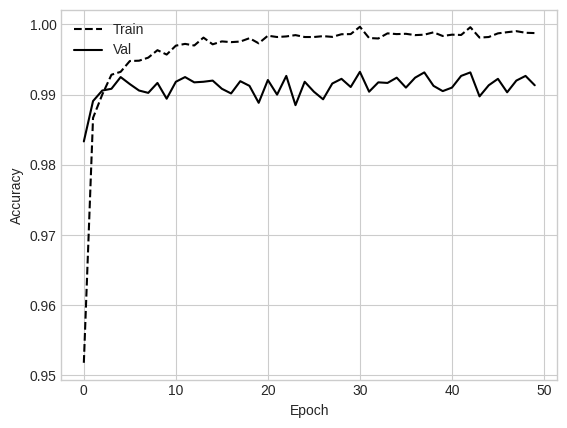

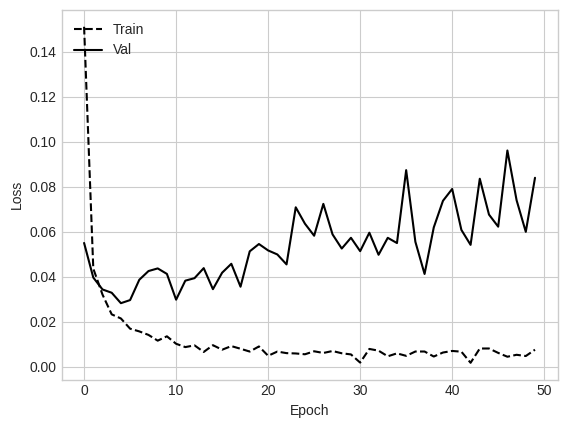

In [ ]:
# Plotar o grafico do histórico de evolução do treinamento
sty.use('seaborn-whitegrid')
plt.plot(results.history['accuracy'],'k--')
plt.plot(results.history['val_accuracy'],'k')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plota o grafico do histórico de evolução da taxa de perda da rede
plt.plot(results.history['loss'],'k--')
plt.plot(results.history['val_loss'],'k')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
# Plotar a matrix de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
# Predição da CNN
y_predict=np.argmax(model.predict(x_test), axis=1)

# Preparar Matriz de Confusão
cm=confusion_matrix(np.argmax(y_test, axis=1), y_predict)

313/313 [==============================] - 1s 2ms/step


Confusion matrix, without normalization
[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    2 1030    0    0    0    0    0    0    0]
 [   0    0    1 1007    0    2    0    0    0    0]
 [   0    0    1    0  974    0    1    1    0    5]
 [   0    0    1    3    0  885    2    1    0    0]
 [   5    3    0    0    0    0  949    0    1    0]
 [   0    1    2    1    0    0    0 1022    0    2]
 [   0    0    0    2    2    1    0    0  968    1]
 [   0    0    1    1    8    5    0    2    1  991]]


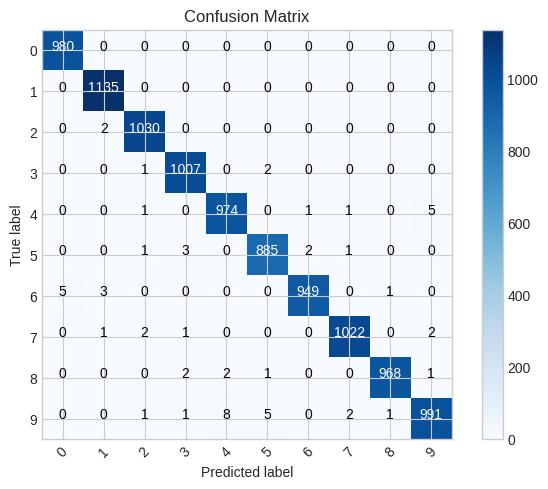

In [ ]:
# Chamada da matriz confusão
cm_plot_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, cm_plot_labels, title= 'Confusion Matrix')


In [ ]:
# Salvando o modelo, a arquitetura da CNN
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
  json_file.write(model_json)

# Salvando os pesos da CNN
model.save_weights("cnn_weights.h5")

In [ ]:
# Exemplo de como carregar a usar modelo salvo.

from keras.models import model_from_json

# Carregando o modelo
json_file=open("cnn.json", "r")
cnn_json=json_file.read()
json_file.close()

cnn_model=model_from_json(cnn_json)

# Carregando os pesos
cnn_model.load_weights("cnn_weights.h5")

# Predição usando o modelo carregado
y_predict=np.argmax(cnn_model.predict(x_test), axis=1)

y=np.argmax(y_test, axis=1)

# Predição usando apenas uma imagem
exemplo=x_test[2]
exemplo = exemplo.reshape(1, 28, 28, 1)
saida=cnn_model.predict(exemplo)
classe=np.argmax(saida, axis=1)
print(classe)

1/1 [==============================] - 0s 285ms/step
[1]


1/1 [==============================] - 0s 18ms/step
Classe predita: [2] rótulo: 4 Score:  0.9997838


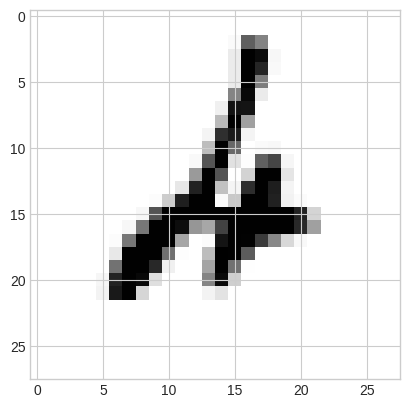

1/1 [==============================] - 0s 17ms/step
Classe predita: [8] rótulo: 9 Score:  0.9292986


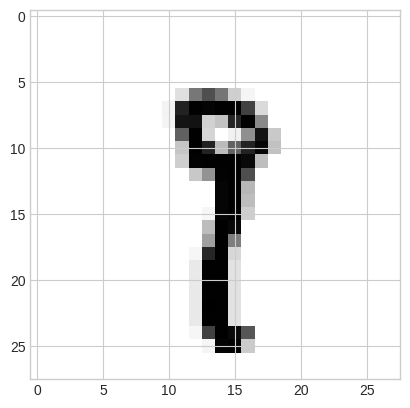

1/1 [==============================] - 0s 17ms/step
Classe predita: [3] rótulo: 8 Score:  0.8938002


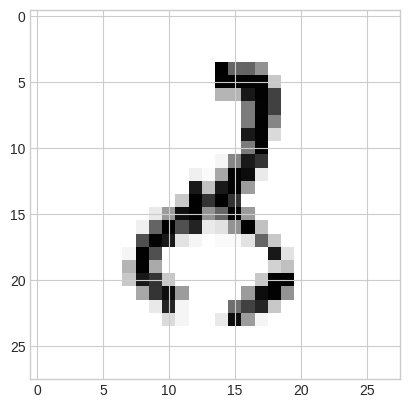

1/1 [==============================] - 0s 22ms/step
Classe predita: [1] rótulo: 2 Score:  0.99363095


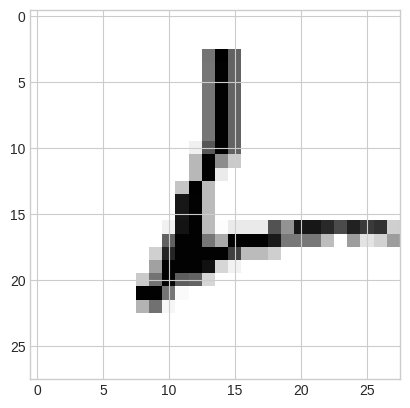

1/1 [==============================] - 0s 25ms/step
Classe predita: [1] rótulo: 2 Score:  0.7023671


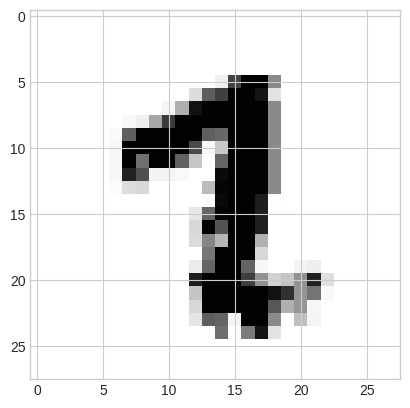

1/1 [==============================] - 0s 18ms/step
Classe predita: [3] rótulo: 7 Score:  0.9642343


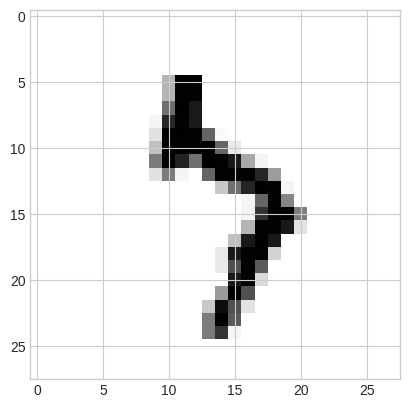

1/1 [==============================] - 0s 17ms/step
Classe predita: [9] rótulo: 4 Score:  0.95828056


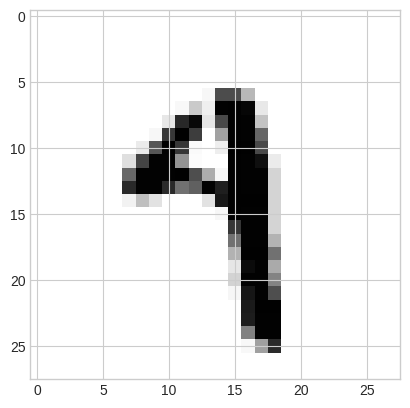

1/1 [==============================] - 0s 27ms/step
Classe predita: [9] rótulo: 7 Score:  0.6739784


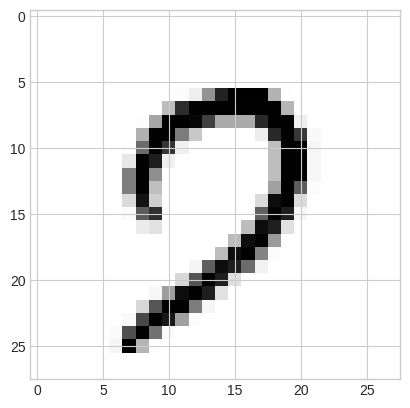

1/1 [==============================] - 0s 16ms/step
Classe predita: [5] rótulo: 3 Score:  0.9382009


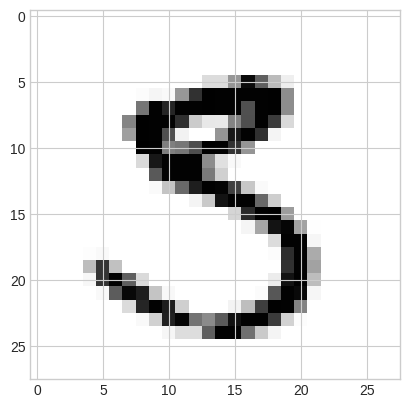

1/1 [==============================] - 0s 18ms/step
Classe predita: [9] rótulo: 8 Score:  0.5418757


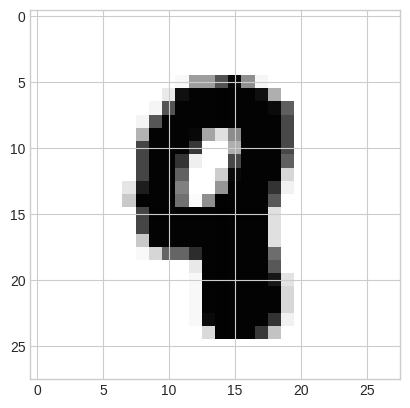

1/1 [==============================] - 0s 25ms/step
Classe predita: [0] rótulo: 6 Score:  0.9741303


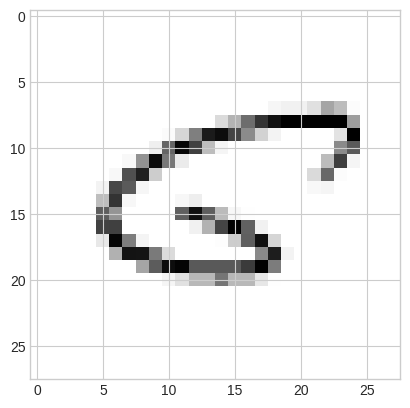

1/1 [==============================] - 0s 28ms/step
Classe predita: [2] rótulo: 7 Score:  0.7580156


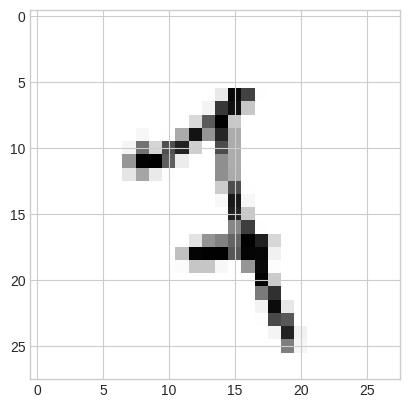

1/1 [==============================] - 0s 17ms/step
Classe predita: [6] rótulo: 4 Score:  1.0


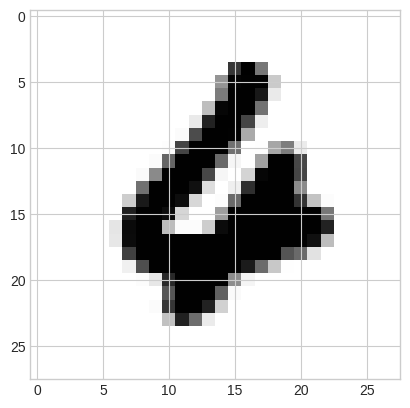

1/1 [==============================] - 0s 19ms/step
Classe predita: [4] rótulo: 9 Score:  0.9999598


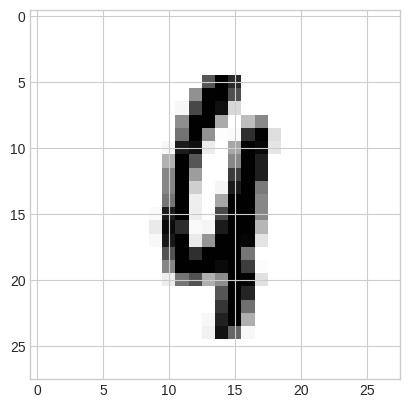

1/1 [==============================] - 0s 18ms/step
Classe predita: [5] rótulo: 9 Score:  0.9996132


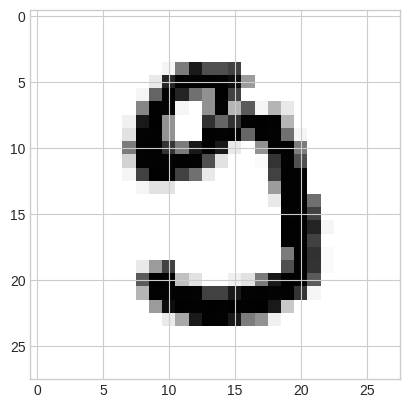

1/1 [==============================] - 0s 17ms/step
Classe predita: [7] rótulo: 5 Score:  0.9052038


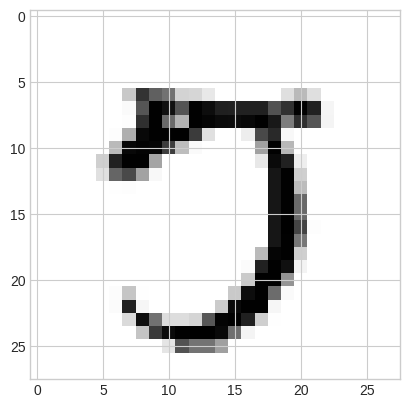

1/1 [==============================] - 0s 18ms/step
Classe predita: [3] rótulo: 5 Score:  0.9914808


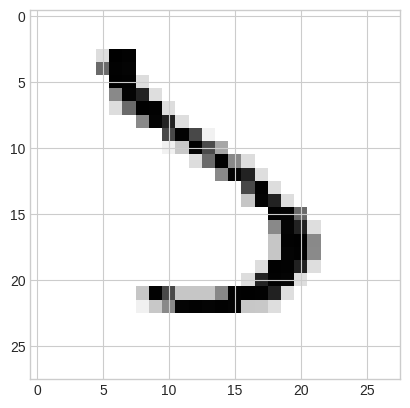

1/1 [==============================] - 0s 18ms/step
Classe predita: [3] rótulo: 8 Score:  0.99985385


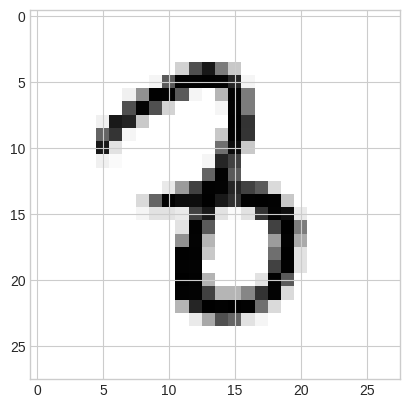

1/1 [==============================] - 0s 17ms/step
Classe predita: [4] rótulo: 9 Score:  0.9867464


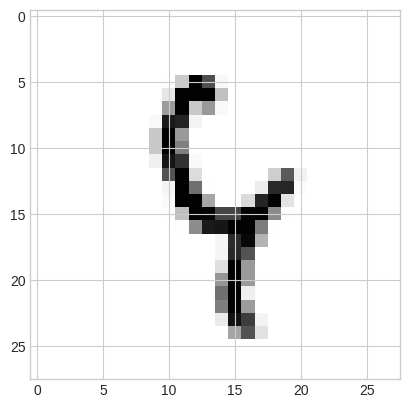

1/1 [==============================] - 0s 18ms/step
Classe predita: [2] rótulo: 9 Score:  0.9544999


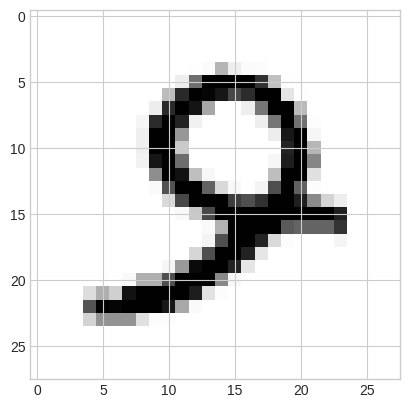

1/1 [==============================] - 0s 19ms/step
Classe predita: [9] rótulo: 4 Score:  0.9788867


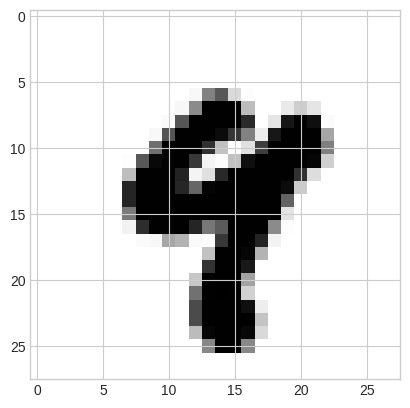

1/1 [==============================] - 0s 16ms/step
Classe predita: [1] rótulo: 6 Score:  0.9986425


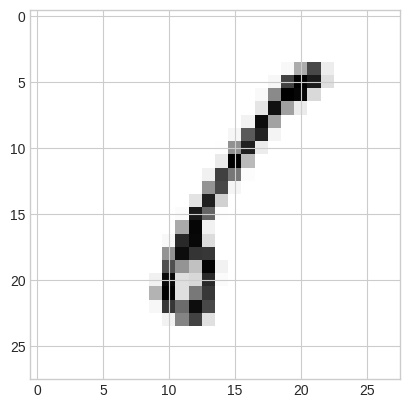

1/1 [==============================] - 0s 20ms/step
Classe predita: [7] rótulo: 4 Score:  0.97877514


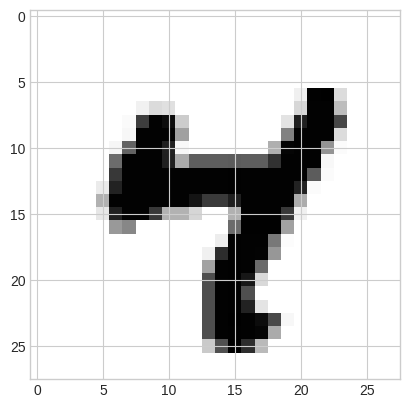

1/1 [==============================] - 0s 17ms/step
Classe predita: [4] rótulo: 9 Score:  0.93446124


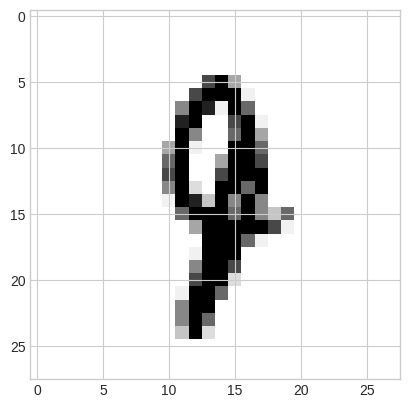

1/1 [==============================] - 0s 19ms/step
Classe predita: [3] rótulo: 5 Score:  0.99437064


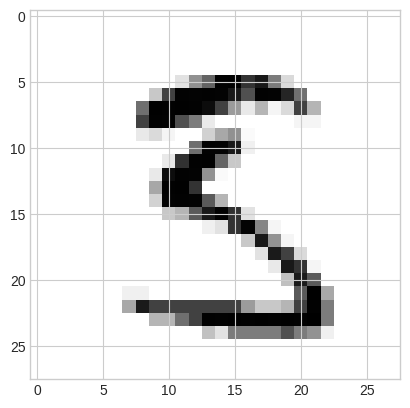

1/1 [==============================] - 0s 28ms/step
Classe predita: [1] rótulo: 6 Score:  0.9999989


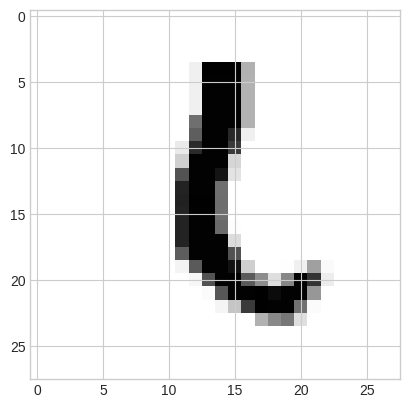

1/1 [==============================] - 0s 16ms/step
Classe predita: [9] rótulo: 4 Score:  0.5025446


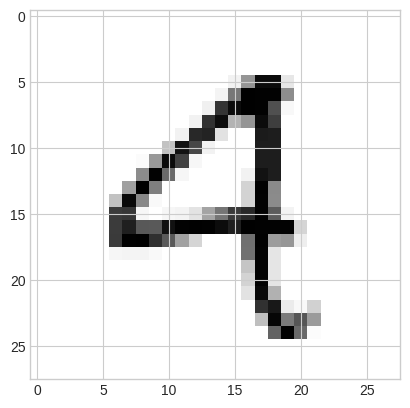

1/1 [==============================] - 0s 17ms/step
Classe predita: [2] rótulo: 3 Score:  0.99597555


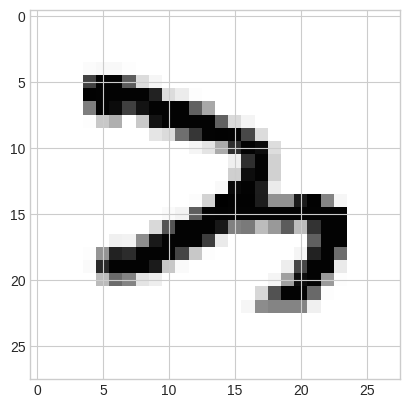

1/1 [==============================] - 0s 16ms/step
Classe predita: [5] rótulo: 9 Score:  1.0


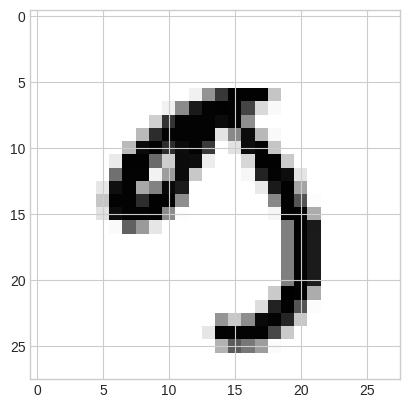

1/1 [==============================] - 0s 27ms/step
Classe predita: [0] rótulo: 6 Score:  0.6749937


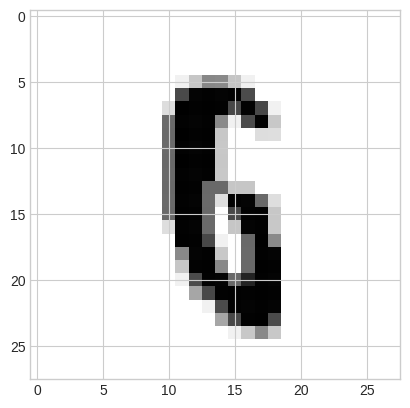

1/1 [==============================] - 0s 17ms/step
Classe predita: [5] rótulo: 9 Score:  0.8805617


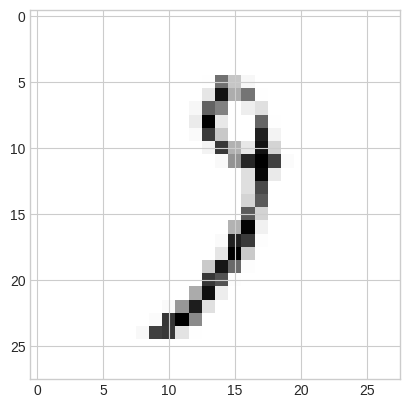

1/1 [==============================] - 0s 19ms/step
Classe predita: [0] rótulo: 6 Score:  1.0


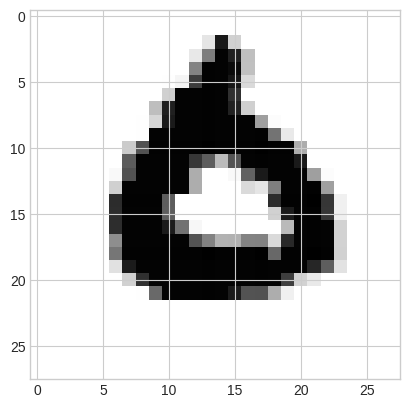

1/1 [==============================] - 0s 33ms/step
Classe predita: [0] rótulo: 6 Score:  0.87935704


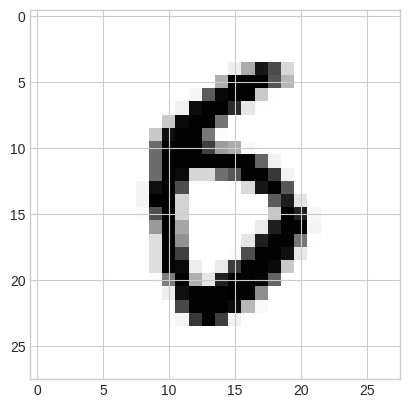

1/1 [==============================] - 0s 17ms/step
Classe predita: [2] rótulo: 5 Score:  0.40458158


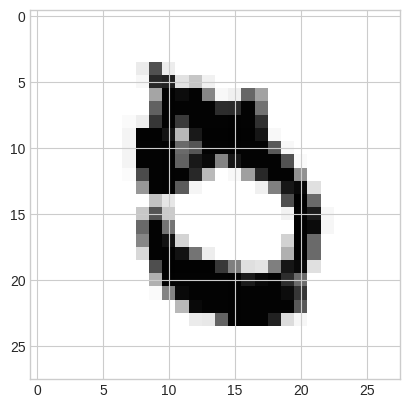

1/1 [==============================] - 0s 17ms/step
Classe predita: [8] rótulo: 6 Score:  0.9999957


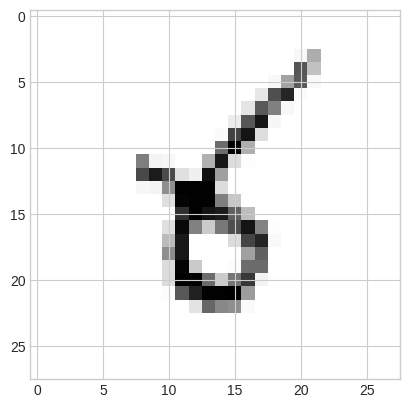

1/1 [==============================] - 0s 25ms/step
Classe predita: [6] rótulo: 5 Score:  0.7209379


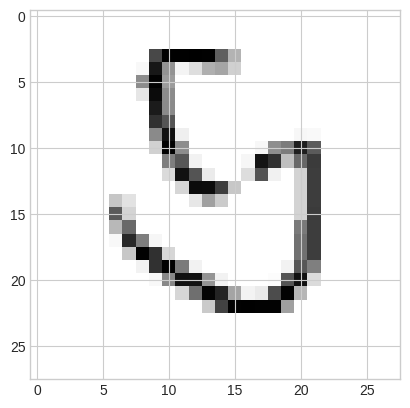

1/1 [==============================] - 0s 18ms/step
Classe predita: [3] rótulo: 9 Score:  0.75689477


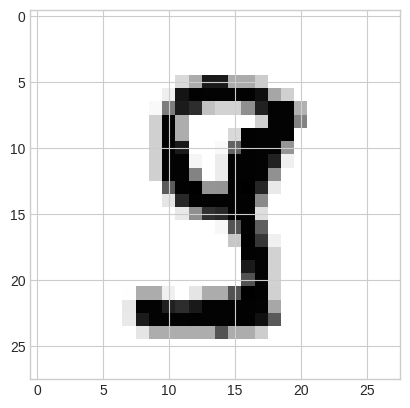

1/1 [==============================] - 0s 20ms/step
Classe predita: [4] rótulo: 9 Score:  0.9998667


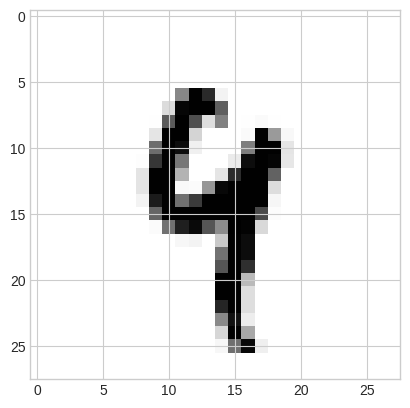

1/1 [==============================] - 0s 19ms/step
Classe predita: [5] rótulo: 9 Score:  0.8280024


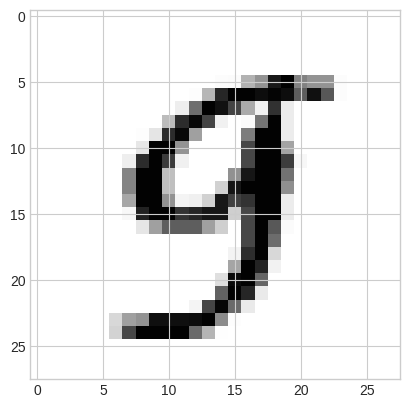

1/1 [==============================] - 0s 17ms/step
Classe predita: [9] rótulo: 7 Score:  0.64262295


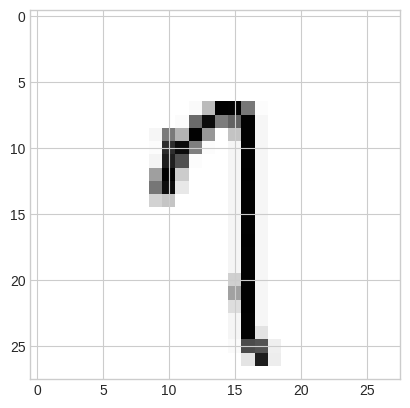

1/1 [==============================] - 0s 18ms/step
Classe predita: [5] rótulo: 9 Score:  0.9956528


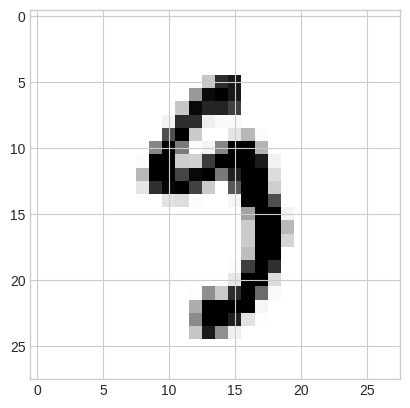

1/1 [==============================] - 0s 19ms/step
Classe predita: [4] rótulo: 9 Score:  0.997976


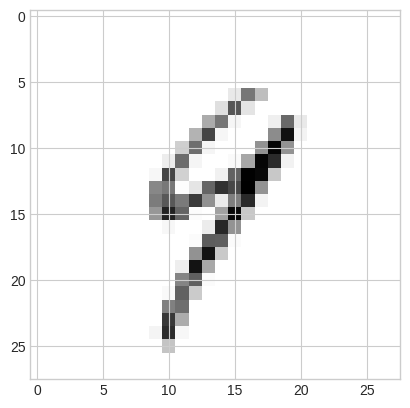

1/1 [==============================] - 0s 18ms/step
Classe predita: [1] rótulo: 6 Score:  0.8364969


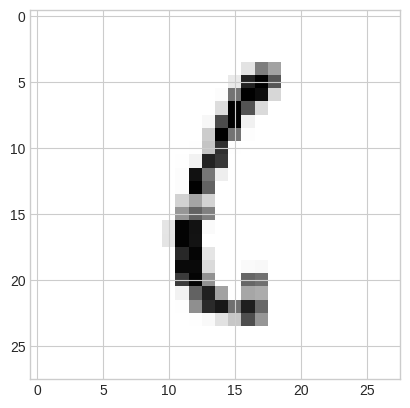

1/1 [==============================] - 0s 18ms/step
Classe predita: [5] rótulo: 3 Score:  0.99917465


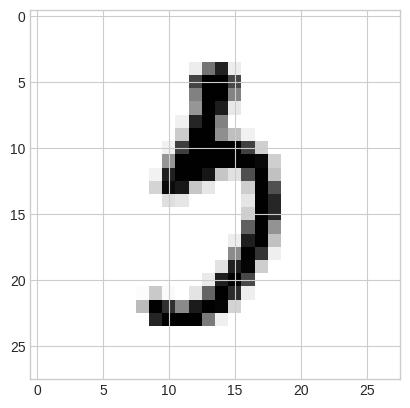

1/1 [==============================] - 0s 27ms/step
Classe predita: [4] rótulo: 9 Score:  0.99993455


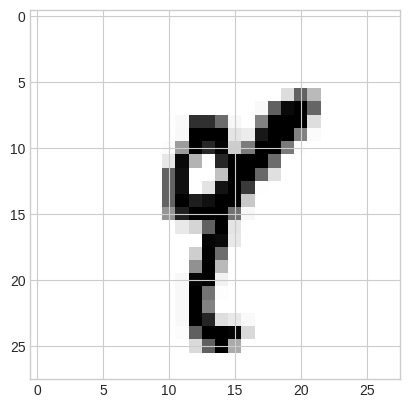

1/1 [==============================] - 0s 16ms/step
Classe predita: [4] rótulo: 9 Score:  0.9972831


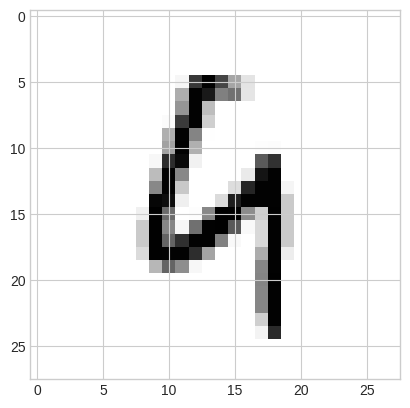

1/1 [==============================] - 0s 23ms/step
Classe predita: [9] rótulo: 4 Score:  0.9988084


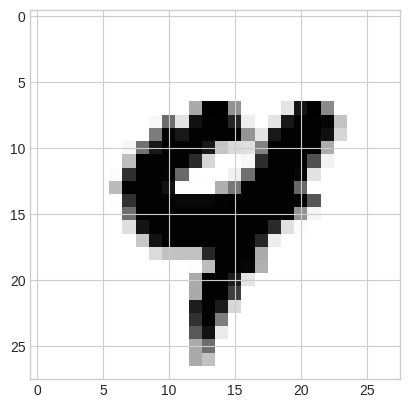

1/1 [==============================] - 0s 27ms/step
Classe predita: [4] rótulo: 8 Score:  0.65179366


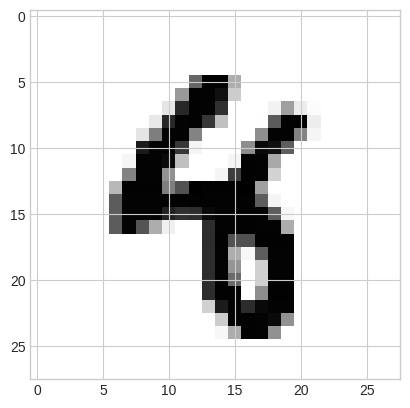

1/1 [==============================] - 0s 30ms/step
Classe predita: [2] rótulo: 7 Score:  0.82845664


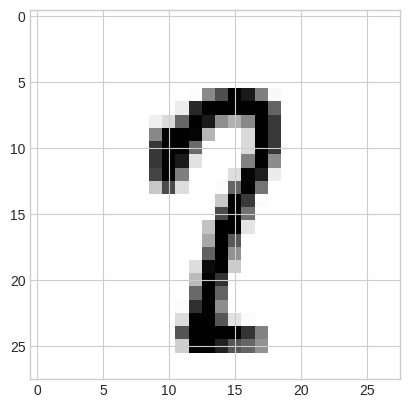

1/1 [==============================] - 0s 18ms/step
Classe predita: [3] rótulo: 5 Score:  0.97926784


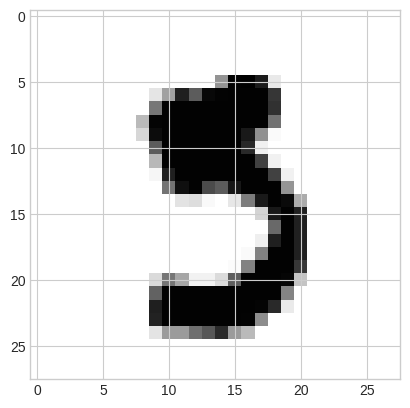

1/1 [==============================] - 0s 20ms/step
Classe predita: [7] rótulo: 9 Score:  0.984455


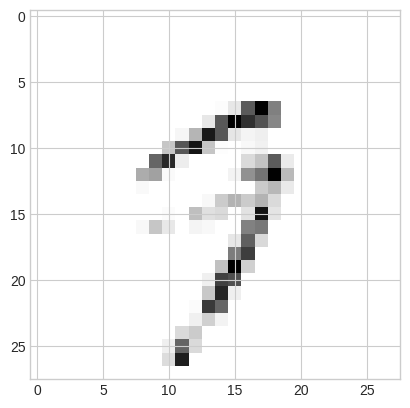

1/1 [==============================] - 0s 18ms/step
Classe predita: [1] rótulo: 7 Score:  0.9985551


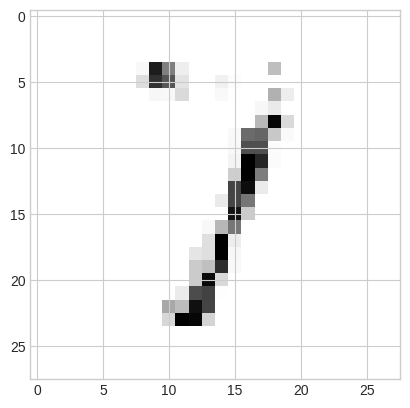

1/1 [==============================] - 0s 18ms/step
Classe predita: [4] rótulo: 8 Score:  0.47169474


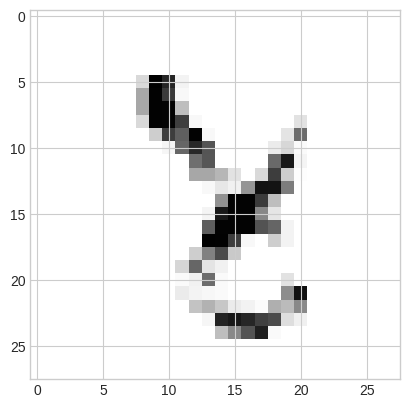

1/1 [==============================] - 0s 18ms/step
Classe predita: [5] rótulo: 8 Score:  0.8687164


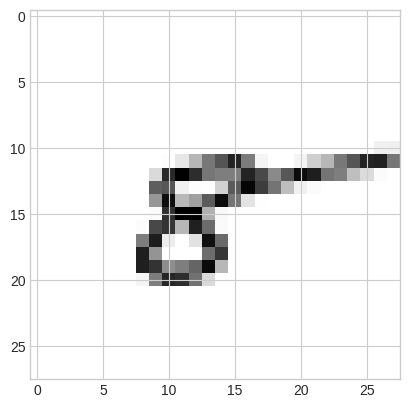

1/1 [==============================] - 0s 17ms/step
Classe predita: [9] rótulo: 4 Score:  0.9914443


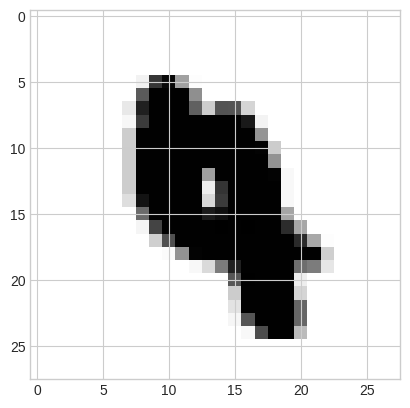

1/1 [==============================] - 0s 17ms/step
Classe predita: [4] rótulo: 9 Score:  0.8864643


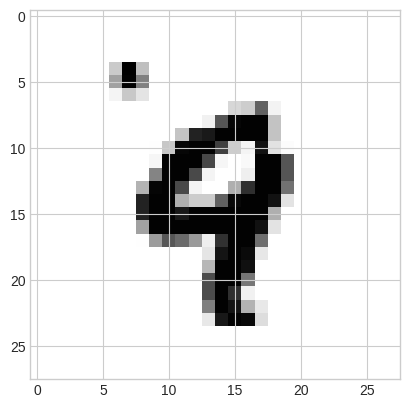

1/1 [==============================] - 0s 17ms/step
Classe predita: [7] rótulo: 9 Score:  0.5811244


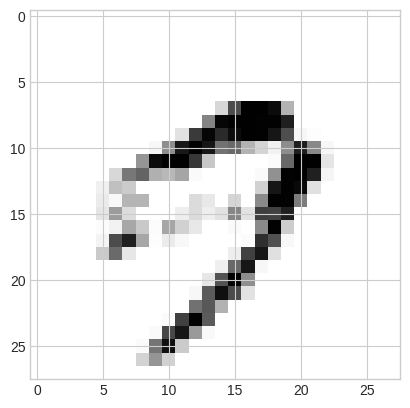

1/1 [==============================] - 0s 18ms/step
Classe predita: [6] rótulo: 5 Score:  0.99812526


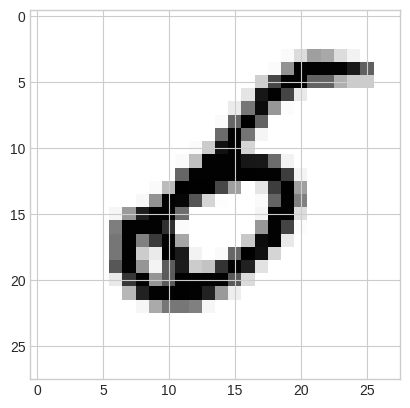

1/1 [==============================] - 0s 20ms/step
Classe predita: [0] rótulo: 6 Score:  0.5687279


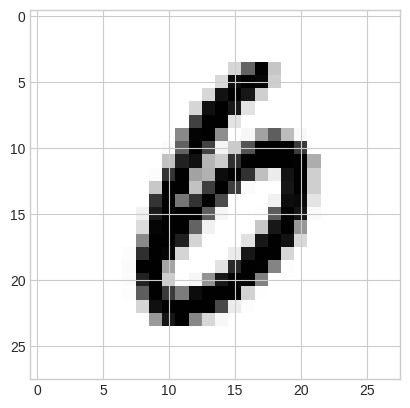

1/1 [==============================] - 0s 26ms/step


In [ ]:
# Plotando os erros do modelo carregado
from matplotlib import pyplot as plt

rotulos=np.argmax(y_test, axis=1)

for i in range(len(x_test)):
  exemplo=x_test[i]
  exemplo = exemplo.reshape(1, 28, 28, 1)
  saida=cnn_model.predict(exemplo)
  classe=np.argmax(saida, axis=1)
  if (classe == rotulos[i]):
    continue
  print("Classe predita:", classe, "rótulo:", rotulos[i], "Score: ", np.max(saida))
  exemplo = exemplo.reshape(28, 28)
  plt.imshow(exemplo, interpolation='nearest')
  plt.show()

